# url: https://datawokagaku.com/kmeans/

# 教師なし学習(クラスタリング)のk-meansをわかりやすく説明【機械学習入門26】

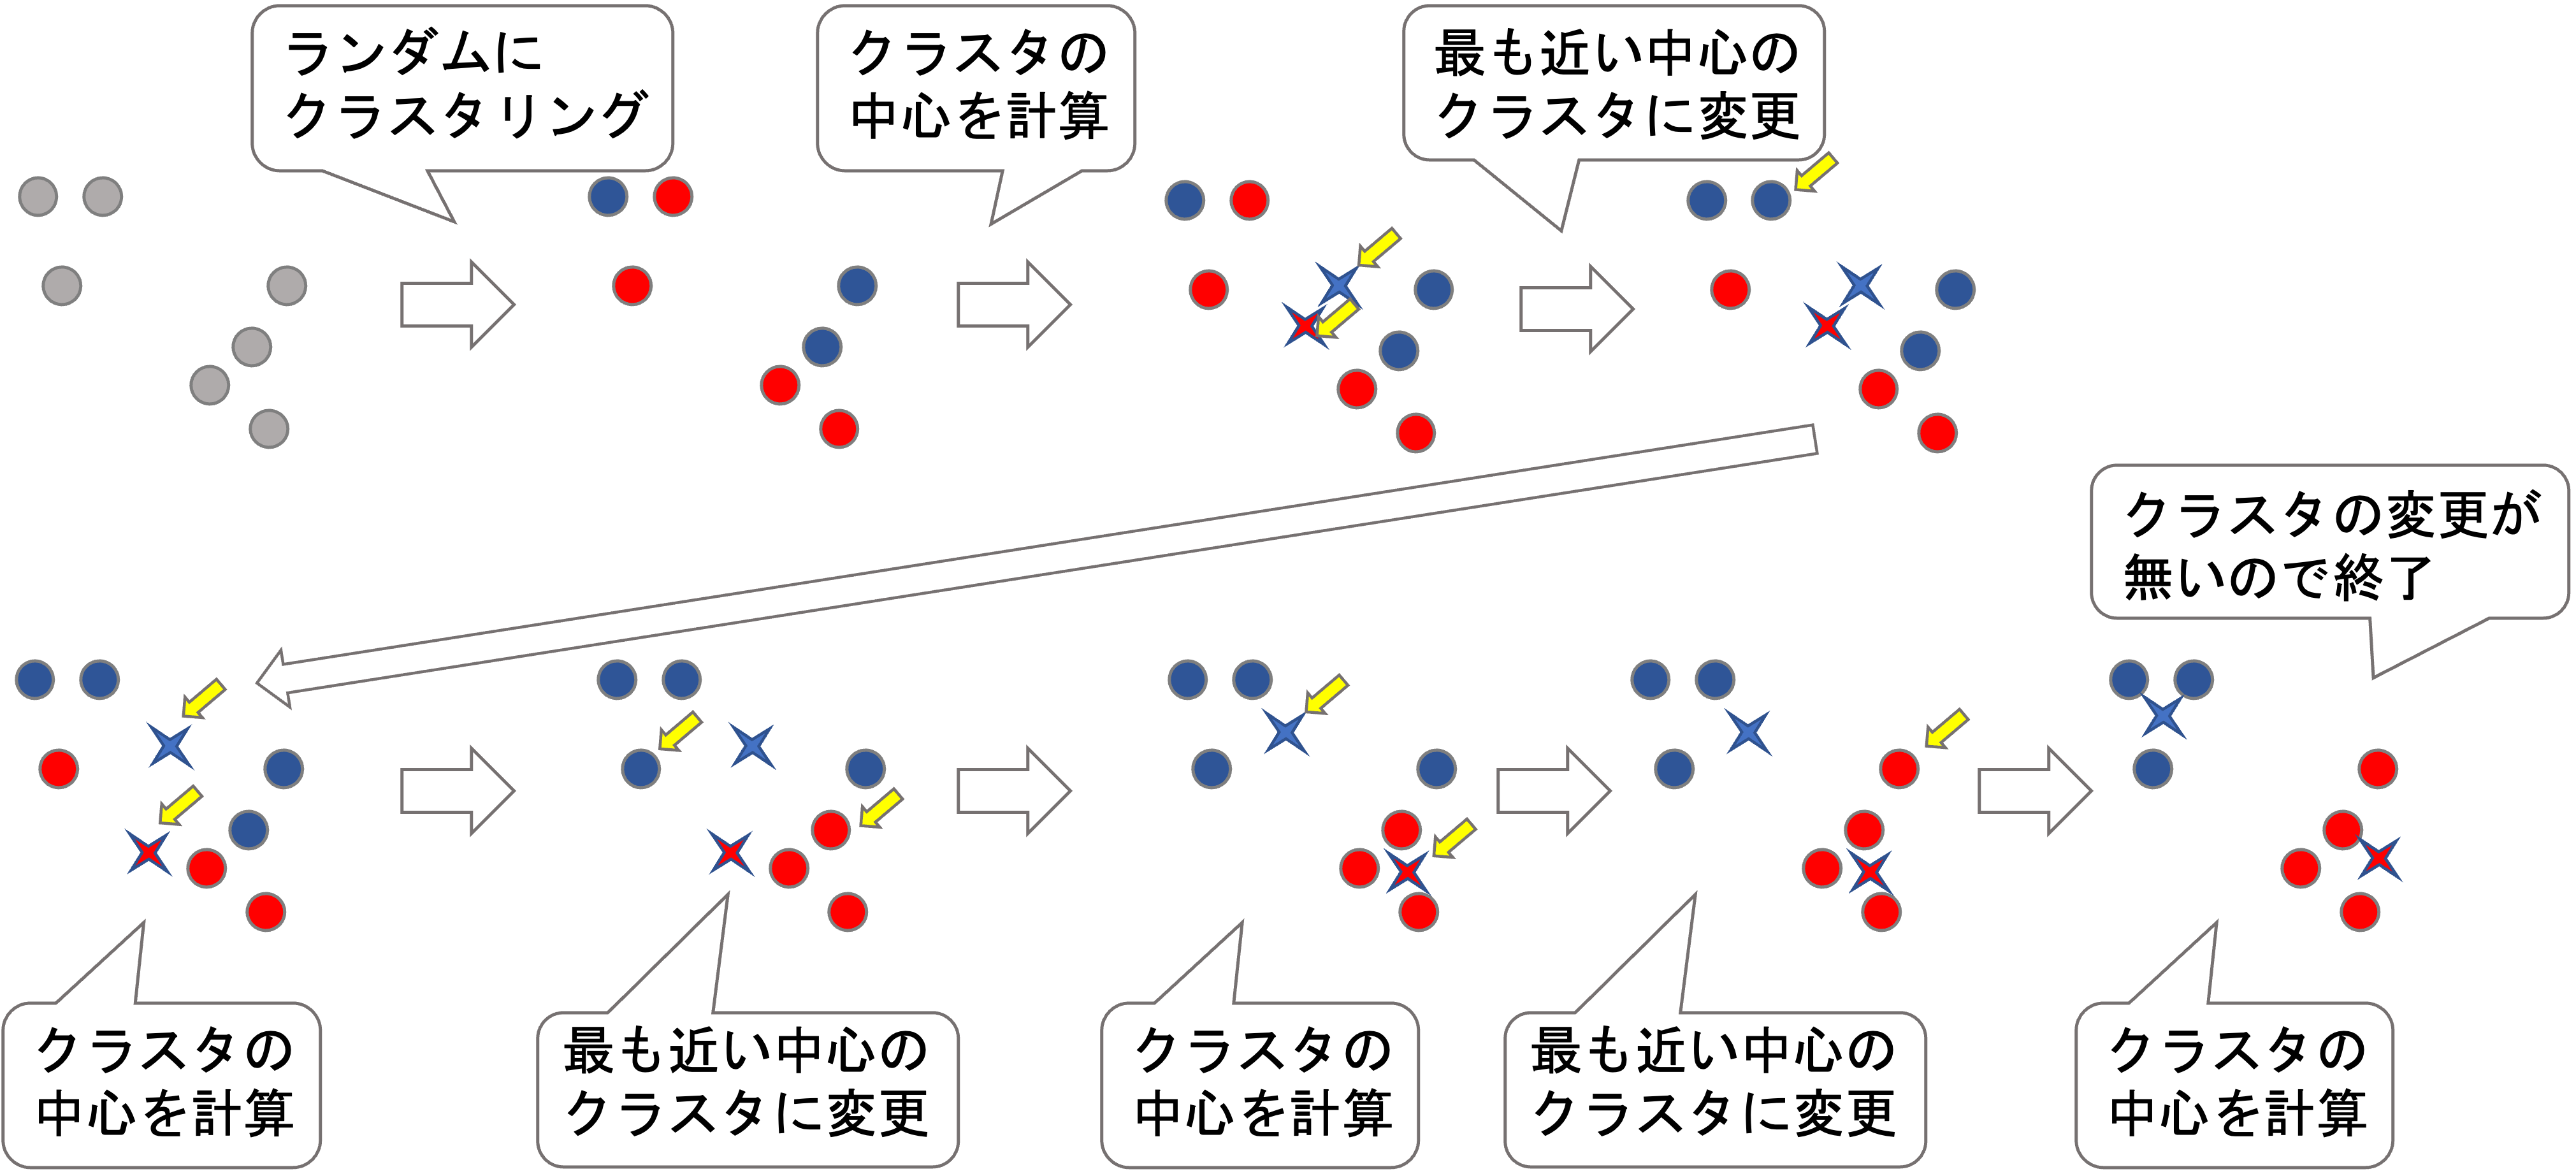

今回の記事から，教師ラベルを必要としない機械学習アルゴリズムである教師なし学習(Unsupervised learning)であるクラスタリング(Clustering)について解説していきます！

特に今回の記事では，その中でも最も有名なk-meansクラスタリング(k-means clustering)というアルゴリズムを解説します．

機械学習モデルの構築で一番大変なのが教師データの収集だったりします．教師なし学習では，それが不要なので気軽にできるモデル構築として好まれています．

それではみていきましょう！

## クラスタリングとは？
第一回の記事にも書いた通り，機械学習には大きく３つのタスクがあるんでしたね

    ・回帰(regression): 連続値を予測する．(ex: 将来の売り上げ予測する等)
    ・分類/識別(classification): カテゴリーやクラス，ラベルと呼ばれる”種類”を判別する. (ex: 病気かどうかを判別する．メールがスパムかどうかを判別する等)
    ・クラスタリング(clustering): データをカテゴリーやクラス，ラベルと呼ばれる”種類”に分別(グループ化)していく．(ex: 顧客の属性をグループ化する等)

今までの講座では，回帰や分類タスクにフォーカスしていましたが，今回の記事から何回かにわけて教師なし学習のクラスタリングについて解説していきます．

教師なし学習では名前通り，教師データを必要としません．正解がないんです．

分類ではそれぞれのデータを，正解のデータセットに基づいてあらかじめ決められたクラスに属する確率を算出して分類を行なっていました．

一方教師なし学習のクラスタリングでは，似たデータを一つのグループとして分別していきます．

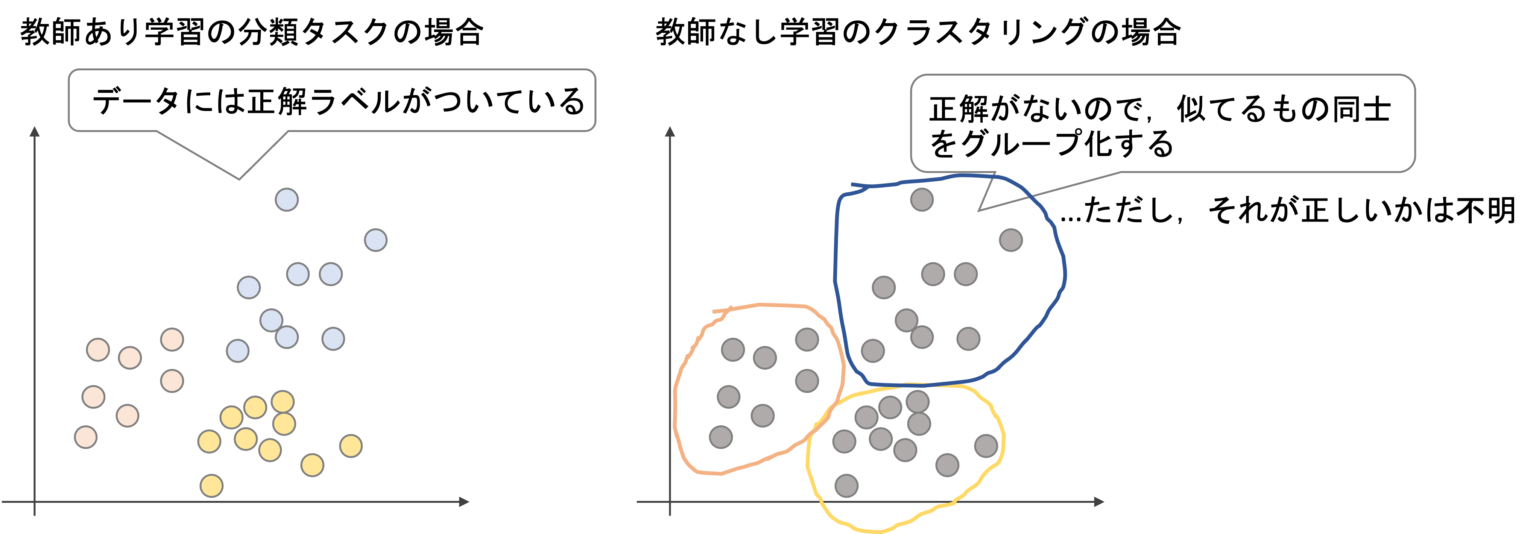

そのため，近いデータ同士を一つのグループとして何個かのグループを作ることになります．ただし，それぞれのグループが何を意味するかはクラスタリングの知るところではありません．

例えば上の例では，教師ありではそれぞれのデータに赤，青，黄と正解ラベルの色がついていますが，教師なし学習では色(正解ラベル)はついていません．これに対して似ているもの同士をグループ化していくわけですが，

    いくつのグループができるかがわかない(正解はない) 2個でも10個でも好きなようにグループを作れる(例，事前に赤，青，黄のデータであることがわからないので，いくつグループを作っていいかがわからない
    それぞれのグループのラベルはわからない．それぞれが何のグループなのかは当事者の解釈次第
    
ということになります．

正解ラベルがないので気軽にできる学習である反面，このように，結果が曖昧になりやすいタスクです．

## k-meansの概要
k-meansは，クラスタリングアルゴリズムの中で最も基本的なアルゴリズムとして知られています．kNNと名前が似てるんですが，違うアルゴリズムなので注意してください．

k-meansは，データをK個のクラスタ(グループ)に分けることを考えます．

例えば以下のような2次元のデータセットを2個(K=2)のクラスタや3個(K=3)のクラスタに分けるイメージです．

url: https://datawokagaku.com/knn/

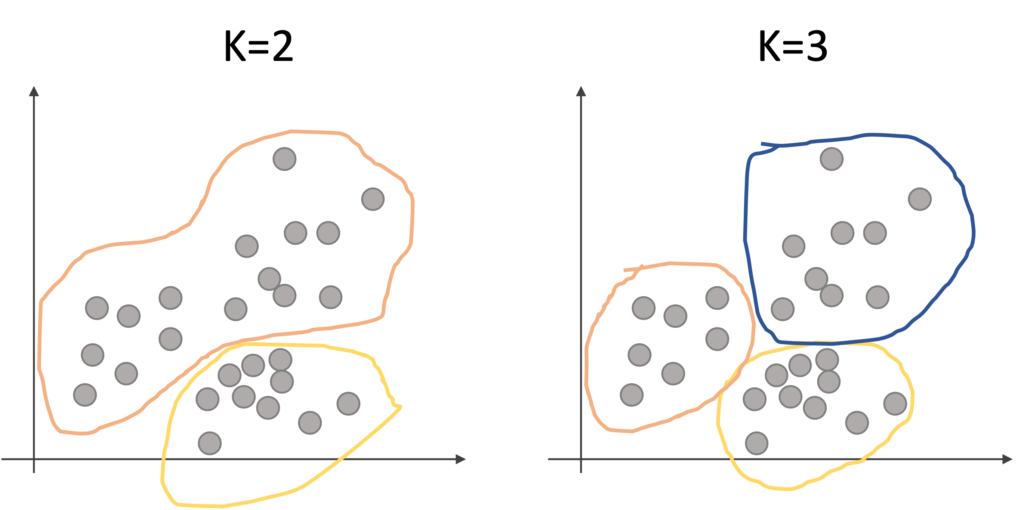

k-meansアルゴリズムを実行すると，上記のような結果になるわけです．(どのようにKを決めるか？どうやってクラスタを決めるのか？については今は一旦置いといてください．後ほど説明します．)

この時，どのようにグループ(クラスタ)わけをするのがいいのでしょうか？

実は，理想的なグループの分け方はクラスタ内のデータの分散の合計が最も小さくなるようにすることです．

例えば以下の例をみてください

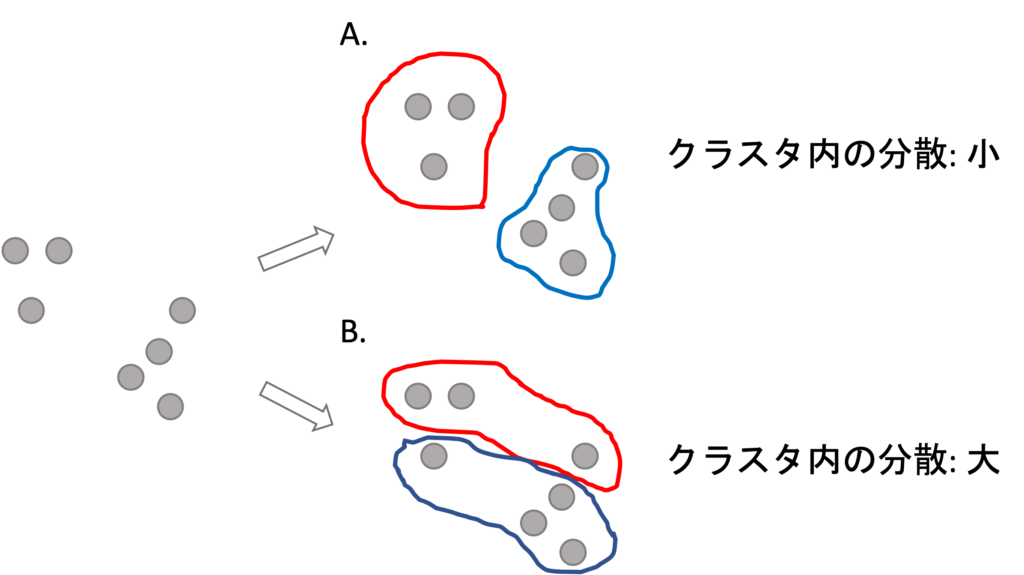

上の例では，明らかにグループ分け(クラスタリング)の結果としてB.よりA.の方が正しそうです．

この差はなんなのか考えてみると，これはクラスタ内のデータの散らばり具合と言えるでしょう．クラスタ内のデータがお互い離れているということは分散が多いく，データ同士が近いということは分散が小さいということです．この「クラスタ内の分散」をそれぞれのクラスタで計算し，その合計が最小になるようにクラスタリングします．

    クラスタ内の分散はどうやって測るの？

これには色々と方法がありますが，一般的なのはクラスタ内の全てのデータ同士の距離(ユークリッド距離)の合計です．つまり，以下のようなイメージです．

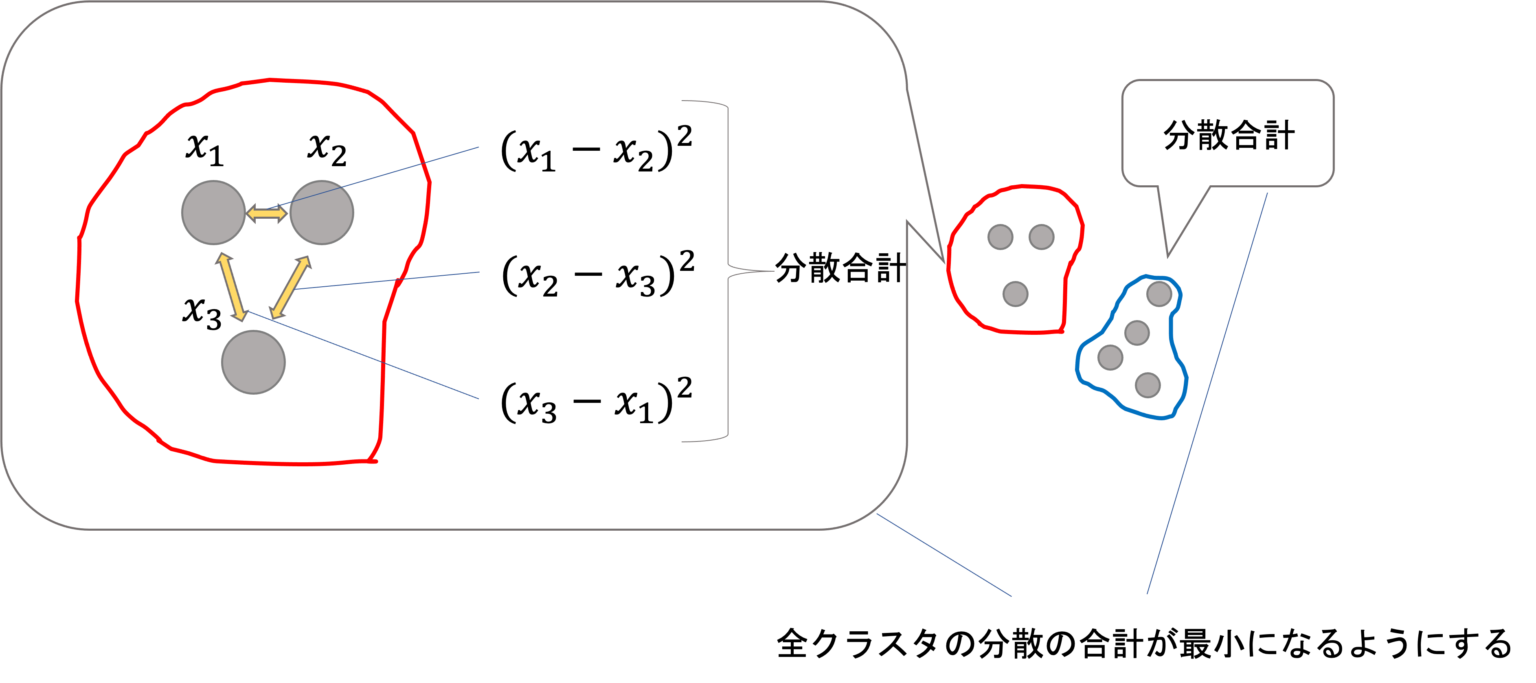

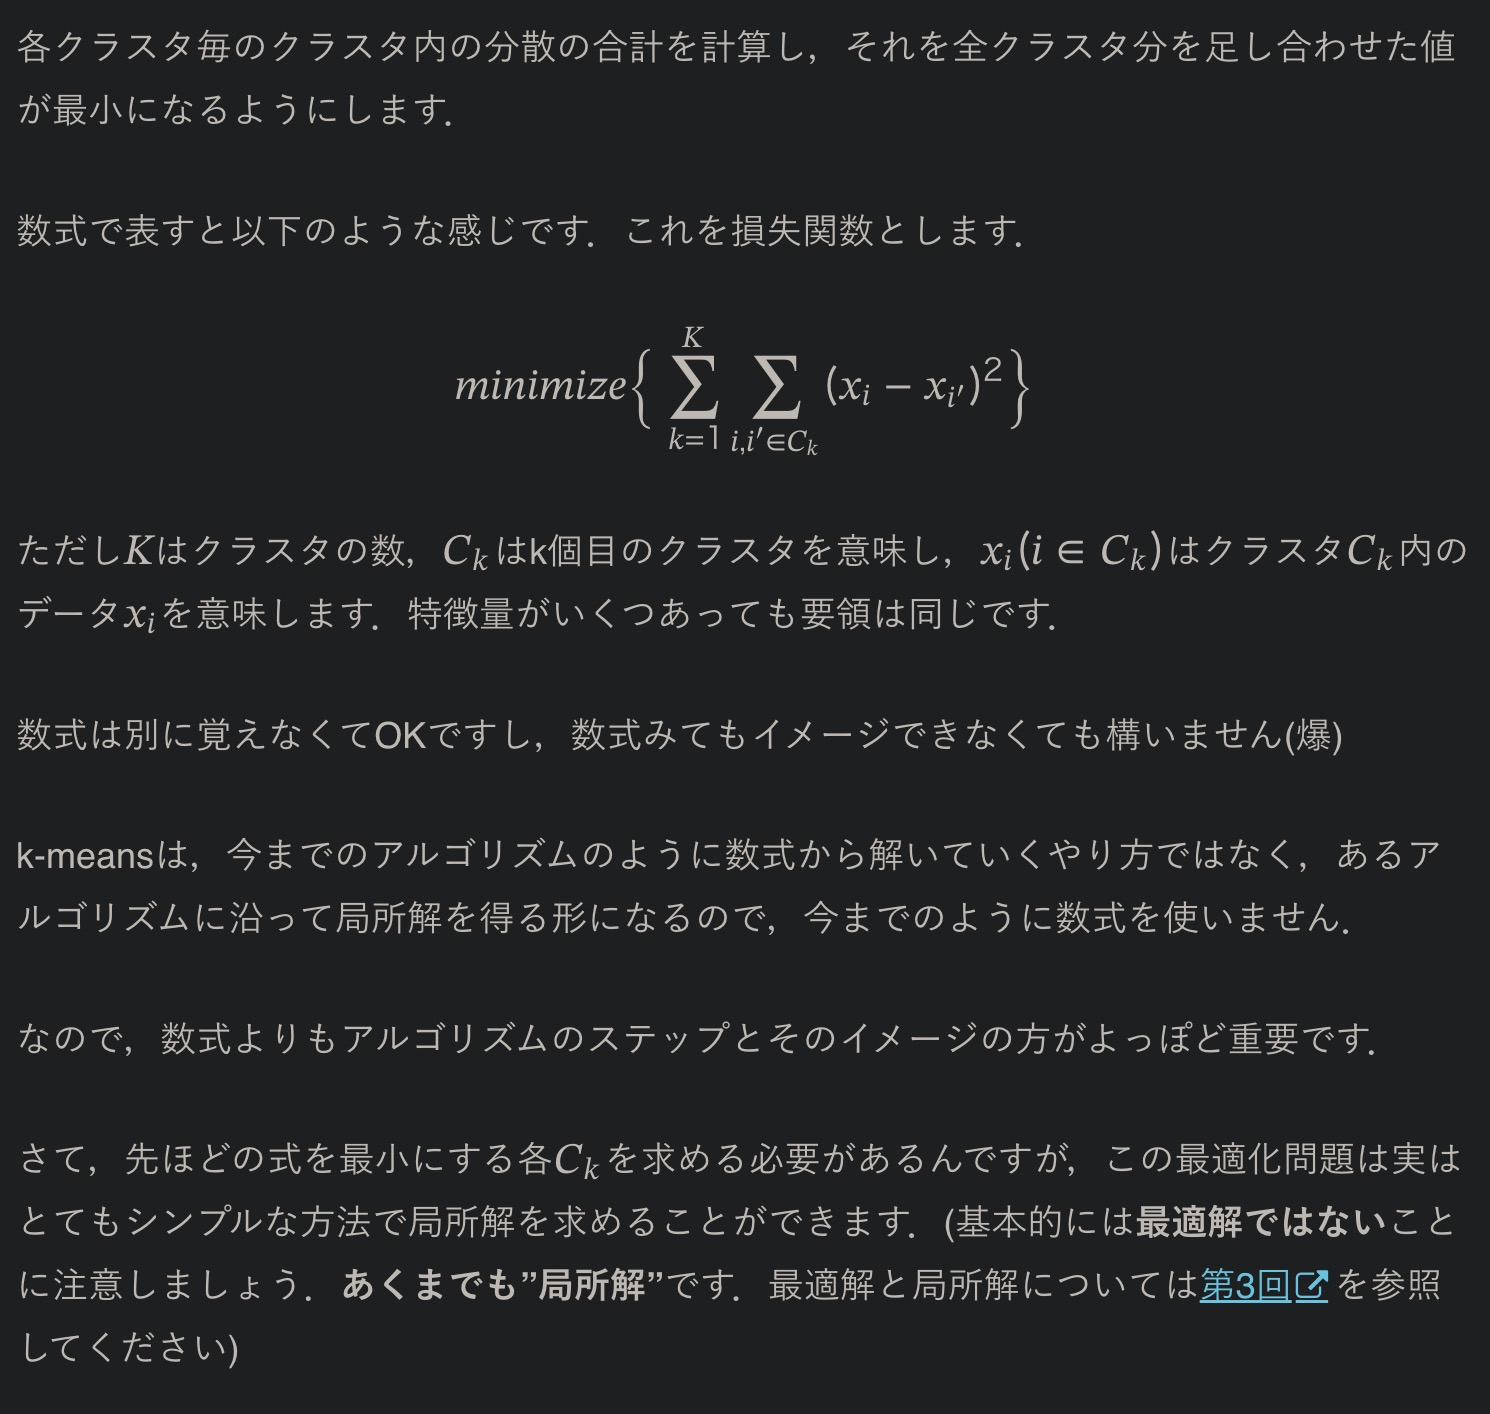

局所解というのは部分的な最適解という認識でいいの?

はい、その通りです。局所解は、最適化問題において、解空間内でのある点がその近傍の他の点よりも優れた解である場合を指します。言い換えれば、その点において目的関数の値が最小または最大になっている状態で、その点の近傍に他にもっと優れた解が存在しないとは限りません。局所解は最適化問題において、その特定の領域での最適な解を指しますが、それが全体の最適解であるとは限りません。

url: https://datawokagaku.com/gradient_descent/

## k-meansのアルゴリズム
以下のアルゴリズムで，局所解に辿りつくことができます．

1. ランダムにそれぞれのデータに対して1〜Kのクラスタを割り振ります．
2. 以下をクラスタが変更しなくなるまで繰り返します．
    1. 各クラスタの”中心”を求める
    2. それぞれのデータのクラスタを，そのデータから最も近いクラスタの”中心”に更新する

文字で読んでもいまいち理解できないかもしれませんが，以下の図を見ればわかりやすいと思います．

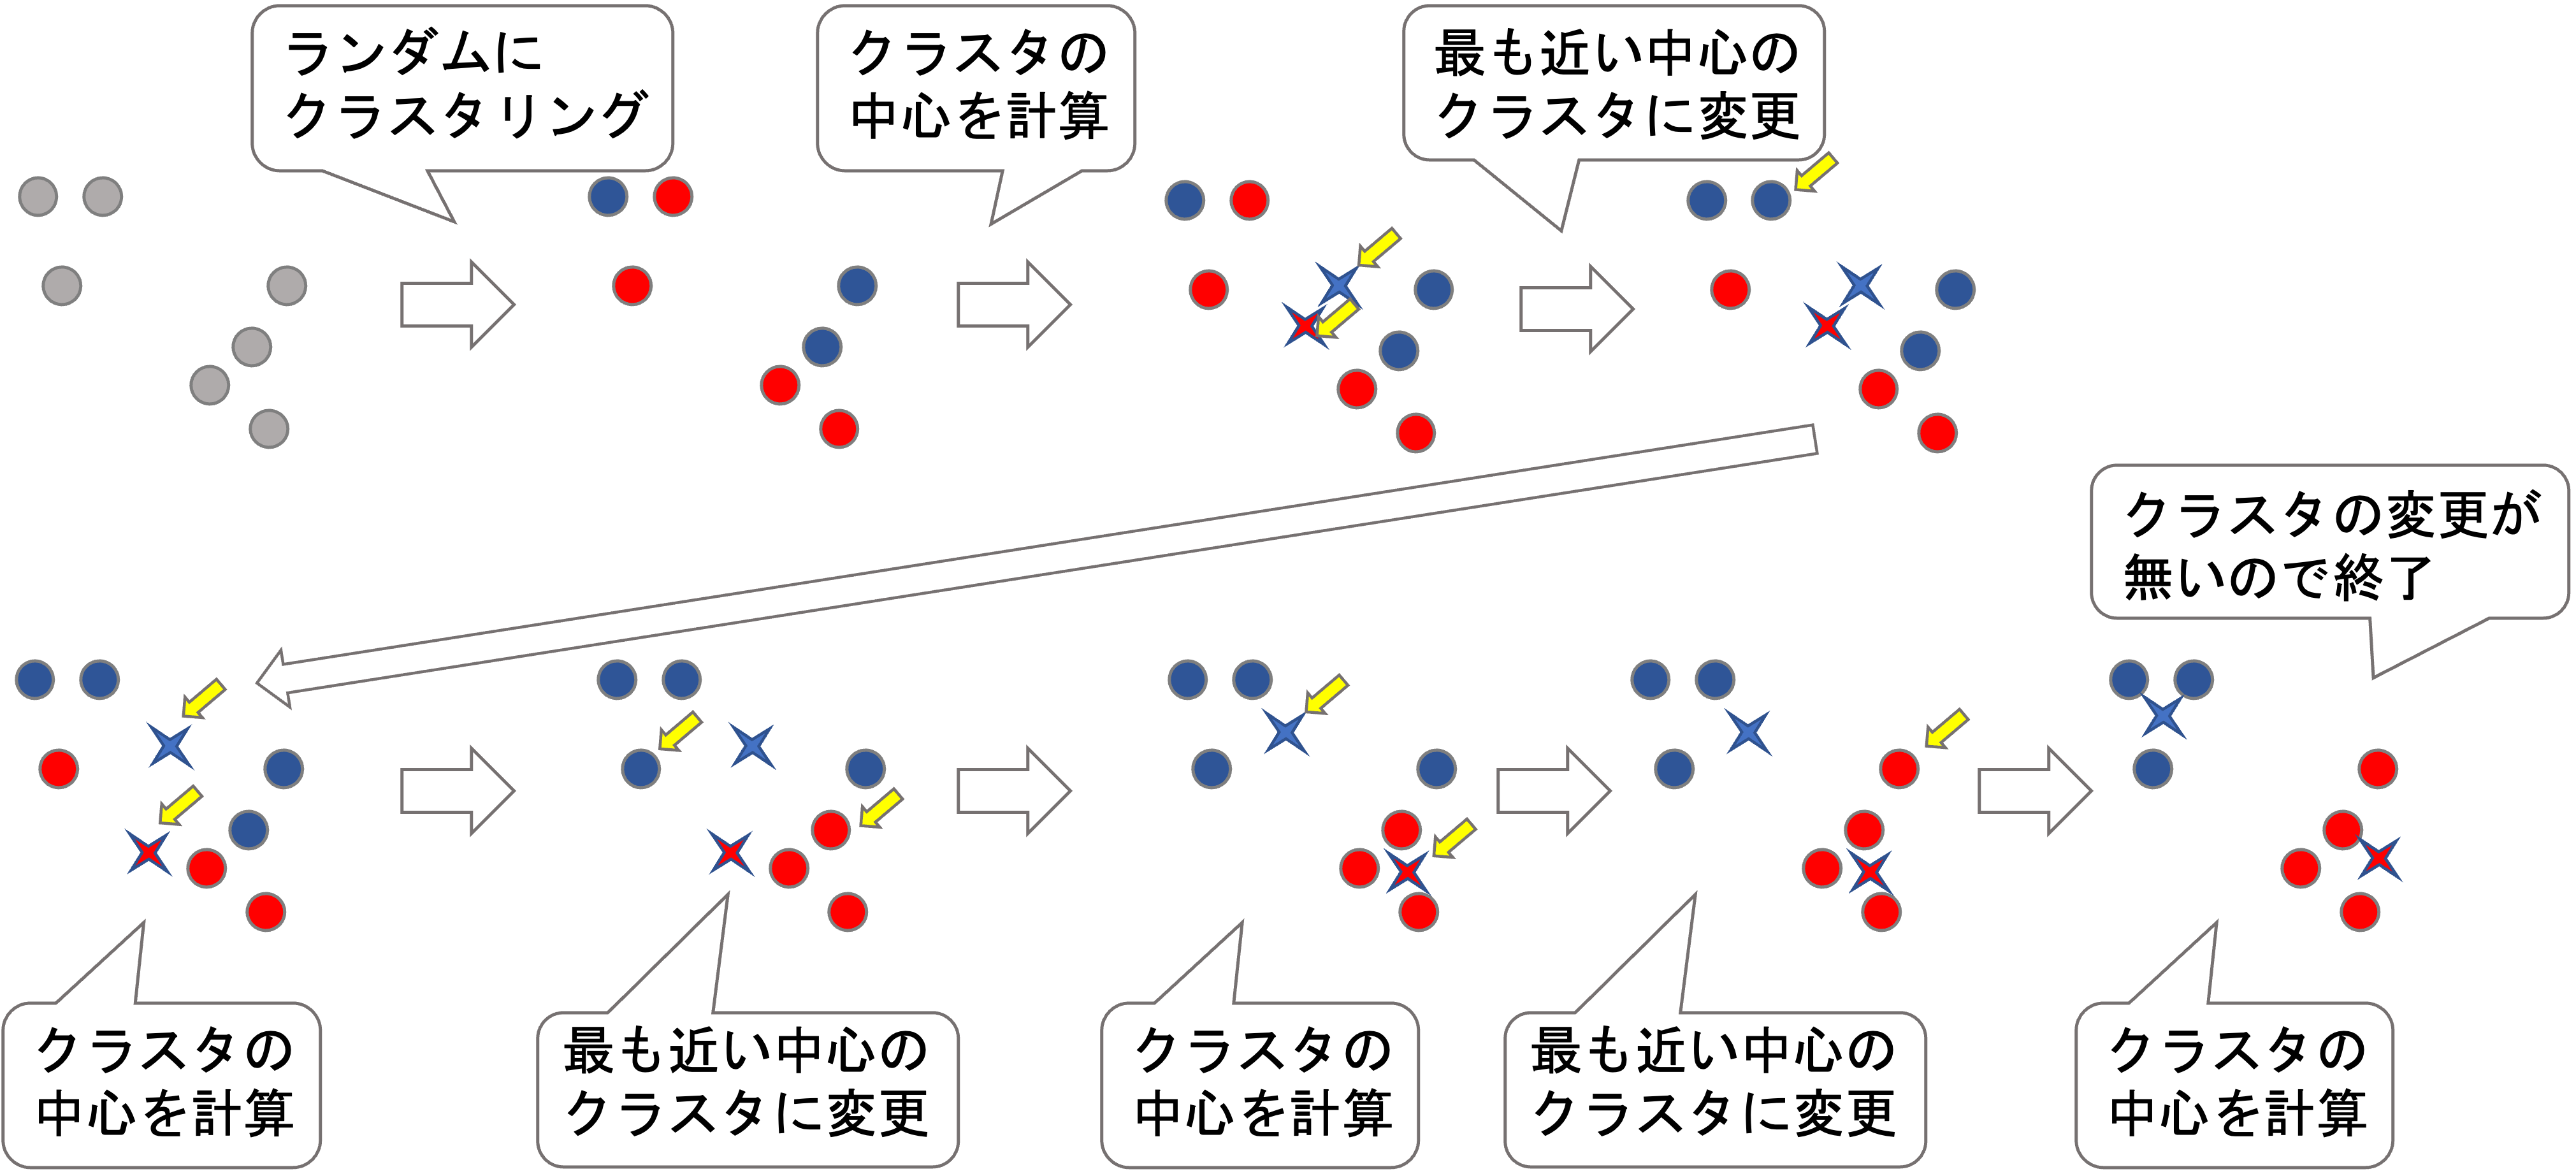

アルゴリズムの流れはかなりシンプルですよね？これによって局所解を見つけることができます．

辿り着くのは局所解だという点に注意しましょう．必ずしも思ったように(損失関数が最小に)クラスタリングされるとは限りません．これは，最初のランダムなクラスタリングによって変わってきます．

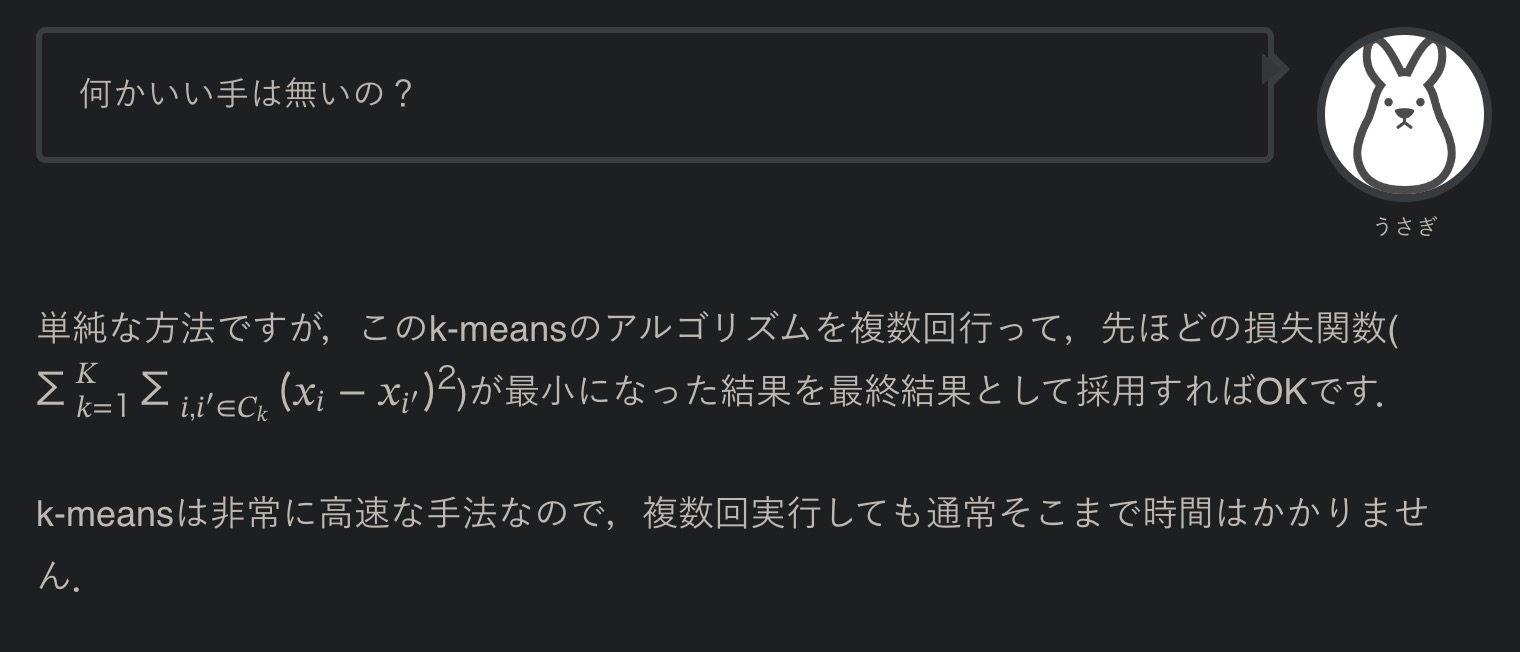

## K(クラスタ数)の決め方

アルゴリズムの概要はわかったけど，どうやってクラスタの数(K)を決めればいいの？

k-meansにおいて正しくクラスタの数Kを決めることは非常に重要です．

・・・重要なんですが，そんな簡単に決めれるわけではありません．

まず当然言えることとしては，データの数𝑚 < クラスタ数𝐾である必要があります．
※ データの数𝑚 > クラスタ数𝐾 じゃないの?

次に，クラスタリングをする際にドメイン背景やユースケースの観点からある程度仮説を立てて決めます．これには正解はありません．

特にそのようなものもないようであれば，Elbow methodと呼ばれる手法があります．

これは，横軸にK，縦軸に損失をplotしていき，ガクッと損失が下がっているところのKを採用するやり方です．

例えば下のような感じ↓

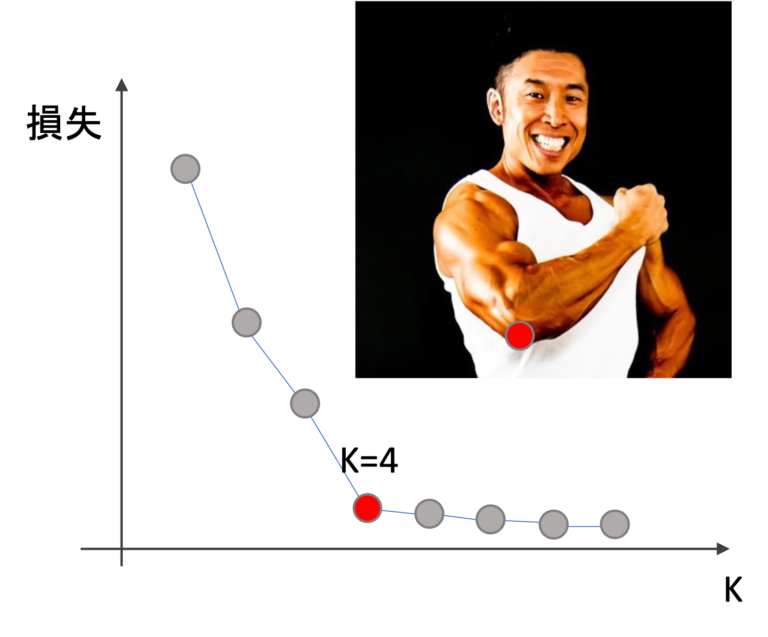

ちょうど肘(elbow)のように見えるので，Elbow methodと言われています．この場合だったら，K=4が良さそうです．

ただ，場合によっては緩やかに損失が下がっていくこともあるので，そういう場合には使えません

### 補足
ちなみに，PCAの際に主成分の数を決める時にもこのElbow methodが使われたりします．その場合は，横軸に主成分の数，縦軸に寄与率をplotします．またこれは余談ですが，PCA自体も主成分を計算するのに正解ラベルを使わないので，ある意味教師なし学習と言えます．

実際には，色々なKを試してクラスタリングしてしっくりくるものを選ぶというのが一般的ですね．

## Pythonでk-meansをする
それではPythonでk-meansをしてみましょう．

scikit-learnでは当然(?)k-meansを実行するクラス sklearn.cluster.KMeans が用意されています．

今回は今まで何度も登場しているirisデータセットを使って，k-meansでクラスタリングをしてみます．

植物博士になったつもりで，がく片の幅と長さと花びらの幅と長さをみて「どうやらこれらは違う種のようだな・・・」と思いながらクラスタリングするイメージでしょうか？笑

まずはデータを取得します．

In [1]:
import seaborn as sns

# データロード
df = sns.load_dataset('iris')

# 学習データとテストデータ作成
X = df.loc[:, df.columns != 'species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


教師なし学習なので，目的変数である’species’カラムは使いません．

これを学習データとしてk-meansでモデルを学習します．教師なし学習なので，今回は学習データとテストデータには分けず，全てのデータを使います．

KMeans クラスは，インスタンス生成時に n_clusters 引数にクラスタ数Kを指定します．ひとまず今回は 3 を指定してやってみましょう！その後インスタンスに対して .fit() メソッドで学習します．
また，最初のランダムのクラスタの乱数の種を random_state で指定することができます．(先ほど述べたように，望まない局所解を避けるために複数回実行してする場合は，この引数を指定せずに実行してください．そうすれば毎回違う結果を得ることができます．)

---

kmeans = KMeans(n_clusters=3, random_state=0)でrandom_state=0としたら毎回同じ結果を得ることができるの?

はい、random_stateパラメータを固定することで、KMeansアルゴリズムが初期のクラスタ中心をランダムに選ぶ際に用いる乱数のシード（seed）を固定できます。同じrandom_stateの値を使用すると、初期のクラスタ中心の選び方が毎回同じになり、結果としてクラスタリングの結果も毎回同じになります。

例えば、次のようにKMeansを使っているとします：
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

この場合、random_state=0により、アルゴリズムが初期のクラスタ中心を選ぶランダムなプロセスが固定され、同じデータに対して何度実行しても同じ結果が得られます。これは再現性を確保する際に便利です。

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

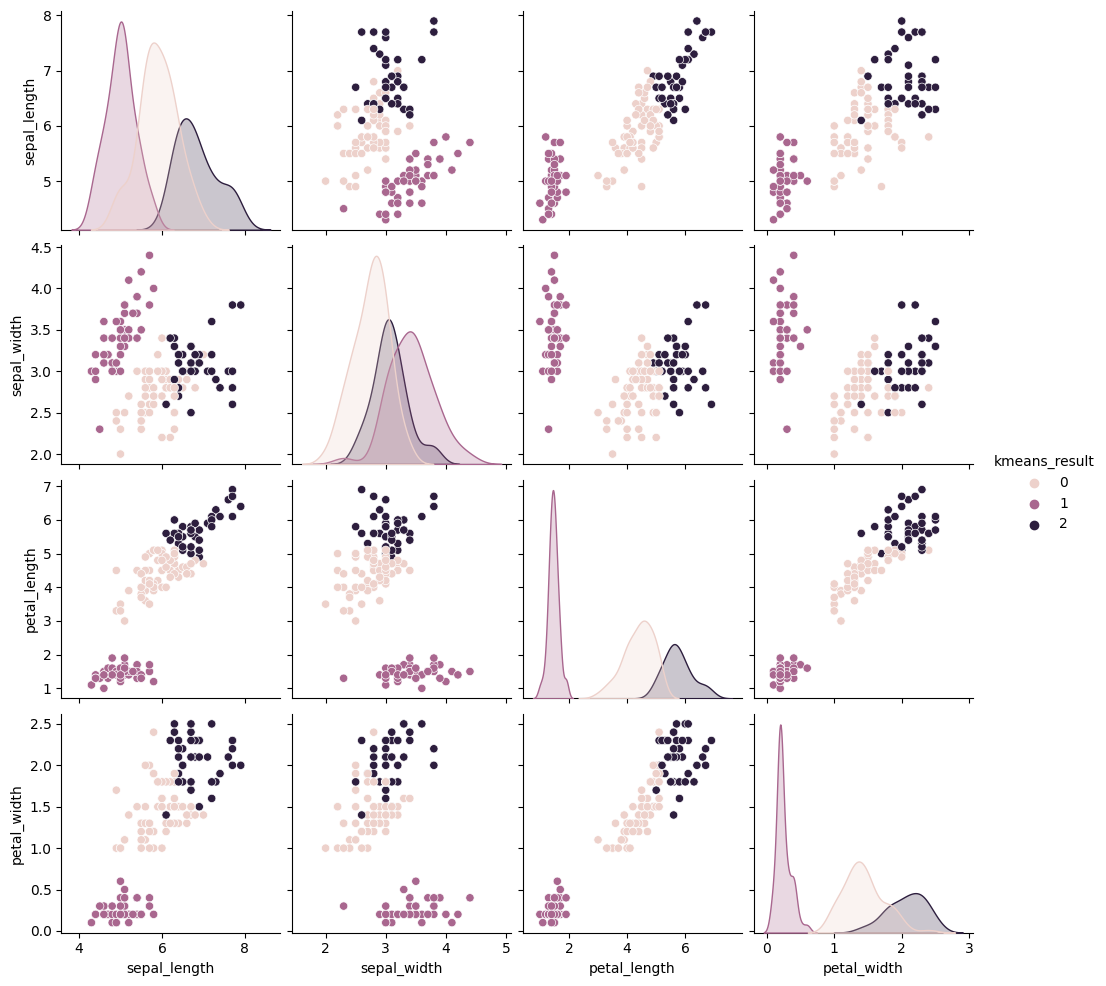

In [3]:
# 学習後は， .labels_ でクラスタの結果を確認できます．
labels = kmeans.labels_
display(labels)

# すると，このように各データに対して0~2のラベルがついています．
# この結果と元の X をくっつけて新たなDataFrameにして可視化してみましょう
import pandas as pd
result_df = pd.concat([X, pd.DataFrame(labels, columns=['kmeans_result'])], axis=1)
sns.pairplot(result_df, hue='kmeans_result')

だいぶ綺麗にクラスタが分かれているのがわかります．

元々のirisデータ(正解)と比べてもいい感じですね．

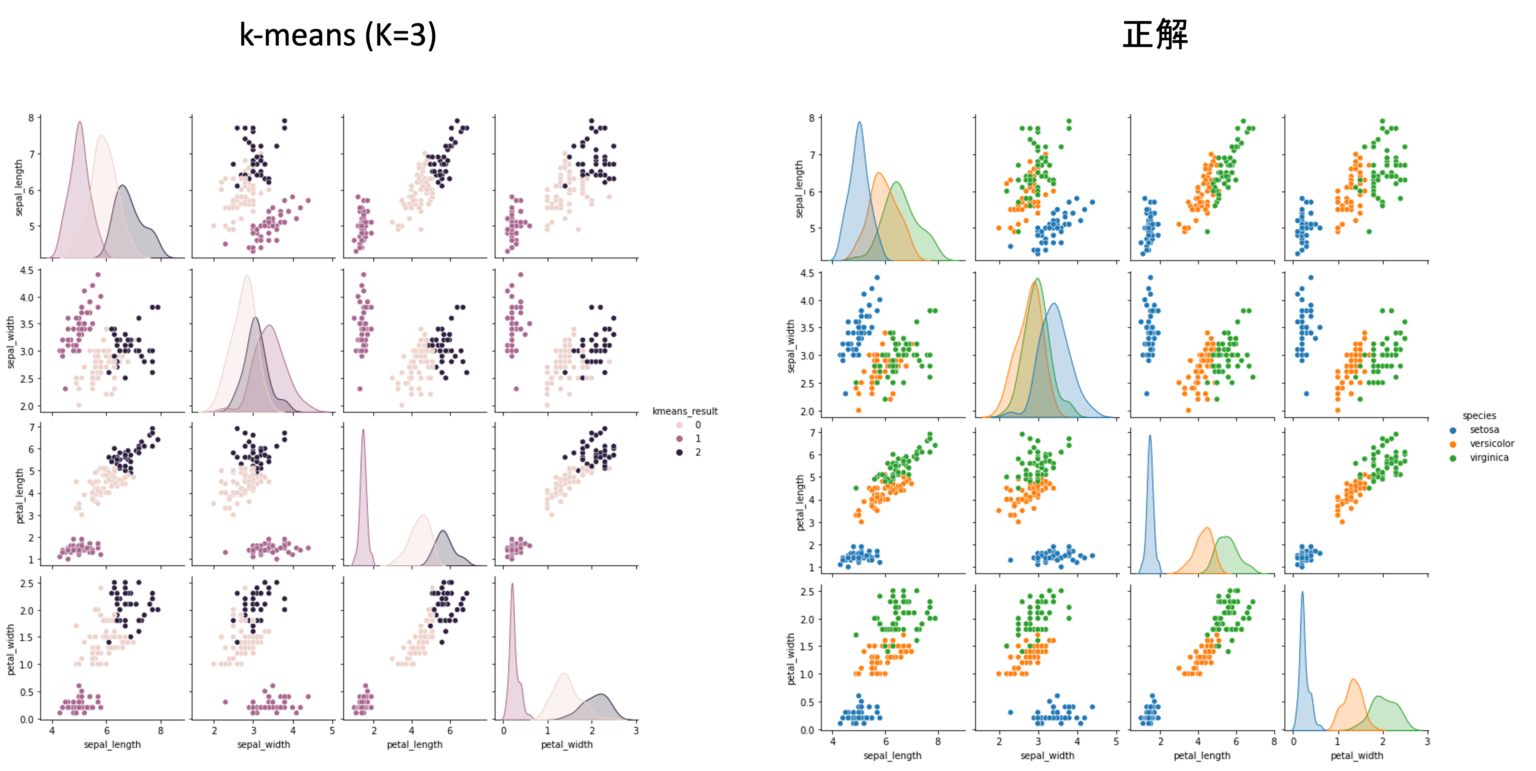

また， .score() メソッドを使って損失を計算することができます．scikit-learn全般でそうなんですが，scoreは「高い方がいい」という形にしているので，実際には損失の正負を逆にした値が返ってくることに注意です．

以下のように n_clusters の値を変えて損失をplotしてみましょう．

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'loss')

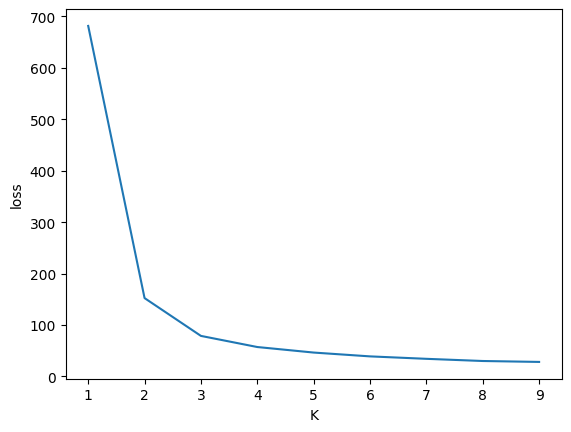

In [4]:
import matplotlib.pyplot as plt
losses = []
for K in range(1, 10):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    losses.append(-kmeans.score(X))

plt.plot(range(1, 10), losses)
plt.xlabel('K')
plt.ylabel('loss')

K=3がちょうど損失がいい感じに下がっていて，それ以降は緩やかに損失が下がっていっているのがわかります．

Elbow method的にもK=3がちょうど良さそうです．

実際には，さまざまなKでクラスタの分布がどうなっているのかをみながら，ドメイン知識やデータの背景を考慮していくことになります．

### データの標準化は必要？

今回はデータを標準化せずに行いましたが，特徴量同士のスケールが異なる場合は標準化した方がいいでしょう．今回のデータはそこまで特徴量同士のスケールに差がないので，標準化をしてもしなくても結果に違いが出ません(興味がある人はやってみましょう！)が，データによっては大きく結果に影響が出るので覚えておきましょう．

この結果をみて，「どうやらこのアヤメは全部同じ種ではなく3つの種に分けることができそうだ」ということが言えるわけです．ただ，「あくまでも今回使った4つの特徴量からでのみ識別できる結果である」ことに注意しましょう．

# まとめ

今回は教師なし学習のk-meansというアルゴリズムについて紹介しました．

    教師なし学習は正解ラベルが不要なので非常に便利な機械学習アルゴリズム
    k-meansはデータをK個のクラスタに分けるクラスタリングアルゴリズム
    k-meansは各クラスタ内のデータの分散の合計を最小にするようにクラスタを設定する
    クラスタ数Kを決めるのは簡単ではなく，データやモデルのユースケースの背景やElbow methodなどを使って決める
    Pythonでk-meansをするには sklearn.cluster.KMeans クラスを使う
    特徴量のスケールに差がある場合は標準化をしてからk-meansを行うと良い

教師なし学習は正解ラベルが不要なので多くの分野で好まれて使われることが多いですが，正解ラベルがない分結果の解釈が難しかったり，ちょっとしたパラメータの違いで全然違う結果にもなったりします．

そのため，結果を報告する際には色々なパラメータで試してみて，それらの結果で共通する部分を見つけたりするといいです◎

次回の記事は，もう一つ有名なクラスタリングアルゴリズムである階層クラスタリング(Hierarchical Clustering)を紹介していきます．

一般的に「クラスタ分析」というと階層クラスタリングを用いることが多いです．色々な分野で使われているアルゴリズムなので，みなさんも一度は見たことがあるかも？それくらい有名なアルゴリズムなのでしっかり押さえておきましょう！

url: https://datawokagaku.com/hierarchical_clustering/

